In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from CallOptionsBasket import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 64  # number of trajectories (batch size)
N = 100  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = CallOptionsBasket(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [4]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 0, Loss: 1.101e+04, Y0: -1.454, Time: 0.39, Learning Rate: 1.000e-03
It: 100, Loss: 1.114e+03, Y0: 4.450, Time: 1.32, Learning Rate: 1.000e-03
It: 200, Loss: 7.230e+02, Y0: 4.504, Time: 1.33, Learning Rate: 1.000e-03
It: 300, Loss: 5.652e+02, Y0: 5.371, Time: 1.33, Learning Rate: 1.000e-03
It: 400, Loss: 5.593e+02, Y0: 5.121, Time: 1.32, Learning Rate: 1.000e-03
It: 500, Loss: 4.245e+02, Y0: 5.714, Time: 1.27, Learning Rate: 1.000e-03
It: 600, Loss: 5.556e+02, Y0: 5.317, Time: 1.33, Learning Rate: 1.000e-03
It: 700, Loss: 4.251e+02, Y0: 5.337, Time: 1.36, Learning Rate: 1.000e-03
It: 800, Loss: 4.540e+02, Y0: 5.090, Time: 1.31, Learning Rate: 1.000e-03
It: 900, Loss: 4.470e+02, Y0: 4.834, Time: 1.34, Learning Rate: 1.000e-03
It: 1000, Loss: 9.582e+02, Y0: 4.377, Time: 1.35, Learning Rate: 1.000e-03
It: 1100, Loss: 4.422e+02, Y0: 5.057, Time: 1.30, Learning Rate: 1.000e-03
It: 1200, Loss: 3.369e+02, Y0: 4.871, Time: 1.30, Learning Rate: 1.000e-03
It: 1300, Loss: 2.461e+02, Y0

In [30]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)


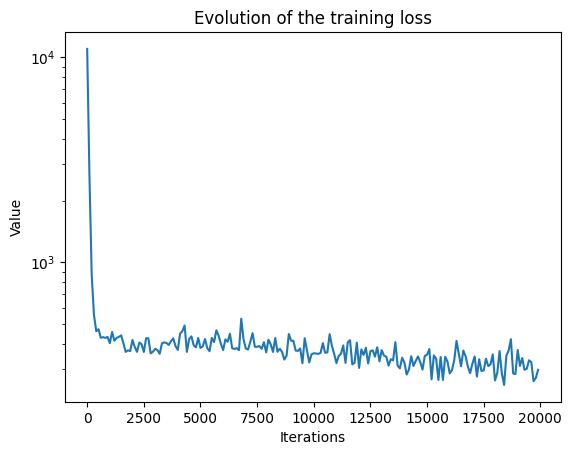

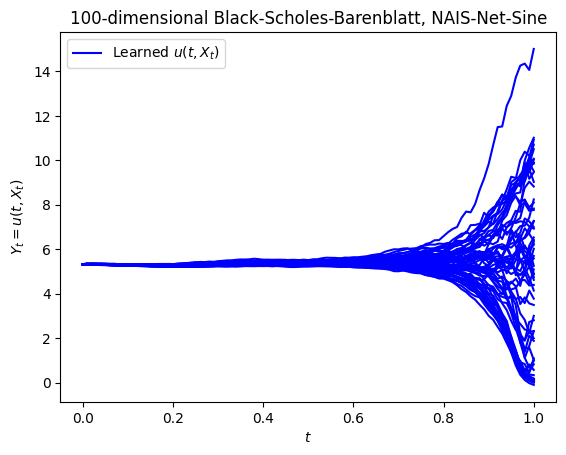

In [31]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 64

plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [32]:
Y_preds = Y_pred.reshape(4096, 101)

In [33]:
time_stamps = t_test[0].reshape(101,)
time_stamps

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ], dtype=float32)

In [34]:
r = 0.05

In [35]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([5.3279443, 5.324352 , 5.320406 , 5.3154593, 5.3097754, 5.303117 ,
       5.2960496, 5.288522 , 5.2805805, 5.272582 , 5.2644515, 5.2565084,
       5.24869  , 5.2410517, 5.2337446, 5.226869 , 5.2205734, 5.2151   ,
       5.2105293, 5.2070594, 5.2047653, 5.203393 , 5.2032766, 5.2039537,
       5.2061205, 5.209059 , 5.212713 , 5.2171903, 5.222244 , 5.2277656,
       5.233535 , 5.2395496, 5.245713 , 5.251698 , 5.2571335, 5.262228 ,
       5.266403 , 5.269835 , 5.2721467, 5.2733836, 5.273197 , 5.2721906,
       5.2702518, 5.267954 , 5.264676 , 5.261028 , 5.257586 , 5.254006 ,
       5.2506113, 5.24761  , 5.244664 , 5.242182 , 5.240417 , 5.2392483,
       5.238834 , 5.238684 , 5.239229 , 5.240271 , 5.241605 , 5.24352  ,
       5.2461753, 5.2486663, 5.251625 , 5.2551036, 5.258661 , 5.2623973,
       5.266435 , 5.269987 , 5.273638 , 5.276302 , 5.278329 , 5.279329 ,
       5.280601 , 5.2799363, 5.2785544, 5.2777967, 5.274826 , 5.2721906,
       5.2705464, 5.270119 , 5.2719235, 5.2744527, 

In [36]:
ene = np.mean(np.exp(-r*time_stamps) * np.minimum(Y_preds,0),axis=0)    
ene

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
      

In [37]:
for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)

In [38]:
X_pred

array([[[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.0543002 , 0.9790009 , 1.0209774 , ..., 1.0481902 ,
         0.92734224, 1.0431652 ],
        [1.0674576 , 1.0423086 , 0.95045984, ..., 0.9916607 ,
         0.94036955, 0.90255976],
        ...,
        [0.9069162 , 3.66287   , 0.82502306, ..., 0.76926166,
         1.0229023 , 1.2434546 ],
        [0.8593582 , 3.8066895 , 0.8225436 , ..., 0.7380451 ,
         0.9916425 , 1.3268063 ],
        [0.8306717 , 3.8065367 , 0.76266706, ..., 0.74140185,
         0.9353125 , 1.3022132 ]],

       [[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.0889834 , 1.0041261 , 1.0010315 , ..., 0.9835782 ,
         0.9178016 , 0.98442817],
        [1.0927398 , 1.0165493 , 1.0323702 , ..., 0.9995665 ,
         0.869371  , 0.94868094],
        ...,
        [1.3438761 , 0.9677715 , 1.131879  , ..., 1.2340451 ,
         0.75197953, 1.3929651 ],
        [1.2

In [39]:
portfolio = np.sum(X_pred, axis=2, keepdims=True)
portfolio

array([[[100.      ],
        [100.22372 ],
        [100.30918 ],
        ...,
        [106.78387 ],
        [107.10793 ],
        [107.72917 ]],

       [[100.      ],
        [100.029594],
        [ 99.96498 ],
        ...,
        [102.04117 ],
        [102.57479 ],
        [102.72758 ]],

       [[100.      ],
        [100.33068 ],
        [101.51429 ],
        ...,
        [102.94333 ],
        [102.516525],
        [103.430176]],

       ...,

       [[100.      ],
        [100.46227 ],
        [100.78126 ],
        ...,
        [107.37579 ],
        [107.22235 ],
        [106.462715]],

       [[100.      ],
        [100.33129 ],
        [100.73069 ],
        ...,
        [101.74862 ],
        [102.21602 ],
        [102.40911 ]],

       [[100.      ],
        [100.664474],
        [100.47702 ],
        ...,
        [104.17319 ],
        [105.15837 ],
        [105.37824 ]]], dtype=float32)

In [40]:
payoff = np.maximum(portfolio - 1 * 100, 0)
payoff

array([[[0.        ],
        [0.22371674],
        [0.3091812 ],
        ...,
        [6.783867  ],
        [7.107933  ],
        [7.7291718 ]],

       [[0.        ],
        [0.02959442],
        [0.        ],
        ...,
        [2.0411682 ],
        [2.574791  ],
        [2.7275772 ]],

       [[0.        ],
        [0.33068085],
        [1.5142899 ],
        ...,
        [2.9433289 ],
        [2.5165253 ],
        [3.4301758 ]],

       ...,

       [[0.        ],
        [0.46227264],
        [0.7812576 ],
        ...,
        [7.3757935 ],
        [7.222351  ],
        [6.462715  ]],

       [[0.        ],
        [0.3312912 ],
        [0.73069   ],
        ...,
        [1.7486191 ],
        [2.2160187 ],
        [2.409111  ]],

       [[0.        ],
        [0.6644745 ],
        [0.47702026],
        ...,
        [4.1731873 ],
        [5.158371  ],
        [5.3782425 ]]], dtype=float32)

In [41]:
average = np.mean(payoff, axis=0, keepdims=True)
average

array([[[0.        ],
        [0.18689479],
        [0.2841876 ],
        [0.359845  ],
        [0.43081826],
        [0.49643493],
        [0.55399954],
        [0.6119225 ],
        [0.6723806 ],
        [0.72924334],
        [0.7919332 ],
        [0.8494463 ],
        [0.9043384 ],
        [0.96683574],
        [1.0158173 ],
        [1.06961   ],
        [1.1199749 ],
        [1.1677455 ],
        [1.2245218 ],
        [1.2865695 ],
        [1.3357058 ],
        [1.3893656 ],
        [1.4431819 ],
        [1.4913487 ],
        [1.545927  ],
        [1.5965177 ],
        [1.6497147 ],
        [1.701408  ],
        [1.7534008 ],
        [1.8073617 ],
        [1.8613155 ],
        [1.9021957 ],
        [1.9495217 ],
        [2.0026581 ],
        [2.0570276 ],
        [2.1016576 ],
        [2.1533275 ],
        [2.1961203 ],
        [2.2527535 ],
        [2.3025036 ],
        [2.347888  ],
        [2.399008  ],
        [2.4393053 ],
        [2.4938576 ],
        [2.5347579 ],
        [2

In [42]:
average.shape

(1, 101, 1)

In [43]:
mc_price = np.exp(-r * 1) * average[:, -1,: ]
mc_price[0][0]

5.0603104

In [44]:
epe_exact = np.array([mc_price[0][0] for s in time_stamps[1:]])
ene_exact = np.array([0.0 for s in time_stamps[1:]])

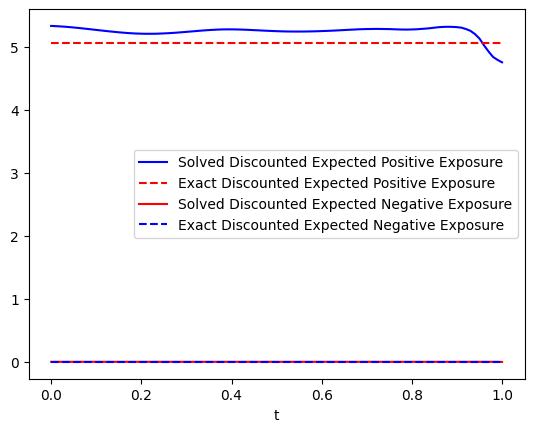

In [47]:
fig = plt.figure()
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,[mc_price[0][0]] + list(epe_exact),'r--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,[0.0]+list(ene_exact),'b--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()

plt.show()

In [46]:
model.save_model("models/100DCallOption.pth")